## Anscombe's Quartet exercise

 For this short exercise, you'll use a dataset called [Anscombe's Quartet](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966) to observe how very different datasets can have similar statistical characteristics, including their mean, variance, and especially their correlation structure. 

First, please read in the data (using your library and function of choice) from the file called `anscombes.csv`.  The dataset is has 4 columns and 44 rows.  The first column is simply an id number.  The second column identifies which dataset (I, II, III, or IV) that row belongs to, and the third and fourth columns are the x and y values for that dataset.  Each of the 4 datasets is intended to have a match set of x and y values.  In otherwords, for dataset I, there are 11 values for x and 11 values for y that go together.

In the cell block below, write the necessary Python code to read in the data from the csv file.  Also the cell block you can do any post-import manipulation of the data that might help you work with them in a simpler fashion.  Remember that there could be any number of correct ways to do this. 

In [1]:
# Code block for importing and manipulating, if desired, the Anscombe's Quartet data. 
import pandas as pd
import numpy as np

filepath = 'anscombes.csv'
orig_data = pd.read_csv(filepath)
data = orig_data.set_index('id')
data

,dataset,x,y
id,,,
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84


I'd like you to investigate Anscombe's Quartet.  Please do the following calculations and respond to the following queries:

First, calculate the mean for both each of the 4 datasets of paired $x$ and $y$ (hint: you should get 8 total mean values corresponding to 4 from the distinct sets for $x$ and another 4 for the distinct sets of $y$ - if you use a `np.mean` function, be sure you are specifying the correct `axis` to perform the calculation across the correct dimension.  

In [7]:
# calculate the mean values of each distinct sets of x and y values here
data_I = data[data['dataset'] == 'I']
data_II = data[data['dataset'] == 'II']
data_III = data[data['dataset'] == 'III']
data_IV = data[data['dataset'] == 'IV']

def mean_sum(d):
    x_mean = np.mean(d['x'])
    y_mean = np.mean(d['y'])
    print("X mean: " + str(x_mean) + " Y mean: " + str(y_mean))
    return x_mean, y_mean

x1, y1 = mean_sum(data_I)
mean_sum(data_II)
mean_sum(data_III)
mean_sum(data_IV)


X mean: 9.0 Y mean: 7.500909090909093
X mean: 9.0 Y mean: 7.50090909090909
X mean: 9.0 Y mean: 7.5
X mean: 9.0 Y mean: 7.500909090909091


(9.0, 7.500909090909091)

**What do you observe about the 4 mean values for $x$? What do you observe about the 4 mean values of $y$?**  

*They are all the same*



Now, calculate the _variance_ for all the distinct sets of $x$ and $y$ (once again, you should have 8 total values when you're finished, 4 for the 4 x datasets and 4 for the 4 y datasets)

In [12]:
# calculate the variance of each distinct sets of x and y values here
def calc_var(ds):
    x = np.var(ds.x,ddof=1)
    y = np.var(ds.y, ddof=1)
    return x, y

x1_var, y1_var = calc_var(data_I)
x2_var, y2_var = calc_var(data_II)
x3_var, y3_var = calc_var(data_III)
x4_var, y4_var = calc_var(data_IV)

x1_var, y1_var, x2_var, y2_var, x3_var, y3_var, x4_var, y4_var

(11.0,
 4.127269090909091,
 11.0,
 4.127629090909091,
 11.0,
 4.12262,
 11.0,
 4.123249090909091)

**What do you observe about the 4 variance values for $x$? What do you observe about the 4 variance values of $y$?**
*they are the same across sets with the 3rd having a rounding difference*

Now, calculate the **Pearson** product moment correlation for each pair of $x$ and $y$ data. Remember there are lots of ways you might do this correlation.  You do not need to calculate a significance level here:


In [15]:
# calculate the correlation between each paired set of x and y
def corr_by_set(ds):
    xy = np.vstack((ds.x, ds.y)).T
    corr_np = np.corrcoef(xy[:,0],xy[:,1])
    return corr_np

corr_I = corr_by_set(data_I)
corr_II = corr_by_set(data_II)
corr_III = corr_by_set(data_III)
corr_IV = corr_by_set(data_IV)

corr_I, corr_II, corr_III, corr_IV


(array([[1.        , 0.81642052],
        [0.81642052, 1.        ]]),
 array([[1.        , 0.81623651],
        [0.81623651, 1.        ]]),
 array([[1.        , 0.81628674],
        [0.81628674, 1.        ]]),
 array([[1.        , 0.81652144],
        [0.81652144, 1.        ]]))

**What do you notice about the Pearson correlation coefficients for each paired x and y set?**
*they are the same across sets*

Finally, use Matplotlib to plot each set of paired x and y values (e.g. the matching values from each pair of rows) in 1 panel in a 4 panel figure (e.g you'll have one figure with 4 separate panels).  Again, there are lots of ways to do this.  If you're feeling ambitious, see if you can use a loop to do this! 


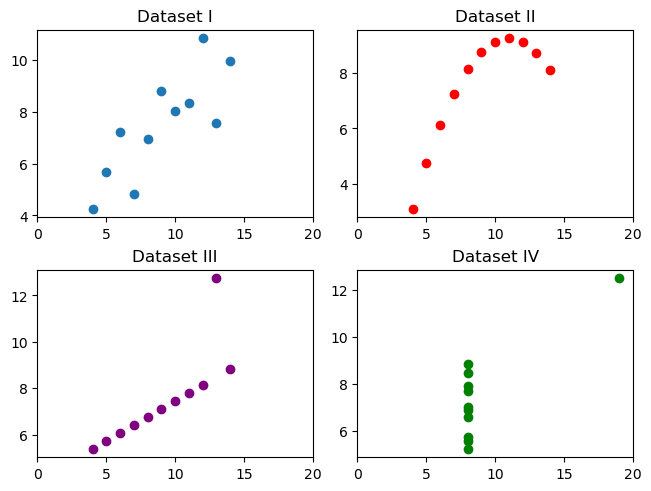

In [39]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, layout='constrained')

axs[0,0].scatter(data_I.x, data_I.y)
axs[0,0].set_xlim([0, 20])
axs[0,0].set_title("Dataset I")
axs[0,1].scatter(data_II.x, data_II.y, color='red')
axs[0,1].set_xlim([0, 20])
axs[0,1].set_title("Dataset II")
axs[1,0].scatter(data_III.x, data_III.y, color='purple')
axs[1,0].set_xlim([0, 20])
axs[1,0].set_title("Dataset III")
axs[1,1].scatter(data_IV.x, data_IV.y, color='green')
axs[1,1].set_xlim([0, 20])
axs[1,1].set_title("Dataset IV")

plt.show()

 **Reflecting on what you calculated and observed above and observing now your plots, can you make a general statement about the need to be careful when evaluating correlation values?**

 *these datasets are dispersed very differently and yet had the same statistics*

If you're interested, there is a Matplotlib page specifically about [Anscombe's Quartet](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html).